# POGS 9 Final Project Analysis

We want to know if there is a correlation between the increase in popularity of K-pop in America and the frequency of English lyrics in K-pop songs. We are testing this by looking at k-pop songs in the Billboard Top 100.

Hypothesis: We believe there is a positive correlation between the amount of English lyrics in a K-pop song and its ranking in the Billboard Top 100. More specifically, we believe that this correlation is cyclical. As interest in the K-pop genre increases in America, K-pop producers attempt to capitalize on this by incorporating more English lyrics in order to appeal to the Western audience. In turn, the increased frequency of English lyrics bolsters the overall popularity of K-pop songs and this cyclical process may continue.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import openpyxl
from scipy.stats import linregress
spotify_data = pd.read_excel(
     'https://query.data.world/s/ey7am5nefbypy4m3l5vw3fnv3yz7wn',
     engine='openpyxl',
    )

hot_stuff = pd.read_csv('https://query.data.world/s/puic3odpttlalwzemfc5tn7w5fkuml')

## Raw Data:

In [2]:
spotify_data

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,NaN,Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,...,10.0,-4.803,0.0,0.0735,0.017000,0.000016,0.1790,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,NaN,A Star Is Born Soundtrack,0.0,215733.0,88.0,...,7.0,-6.362,1.0,0.0308,0.371000,0.000000,0.2310,0.323,95.799,4.0
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",0Xek5rqai2jcOWCYWJfVCF,NaN,Hollywood's Bleeding,1.0,196760.0,86.0,...,6.0,-4.169,1.0,0.2100,0.058800,0.000000,0.0955,0.667,76.388,4.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,1.0,228185.0,61.0,...,8.0,-5.725,0.0,0.1680,0.001240,0.000001,0.0716,0.856,135.979,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28487,"Tonight, TonightThe Smashing Pumpkins",The Smashing Pumpkins,"Tonight, Tonight","['alternative metal', 'alternative rock', 'gru...",7bu0znpSbTks0O6I98ij0W,NaN,Mellon Collie And The Infinite Sadness (Deluxe...,0.0,254626.0,69.0,...,6.0,-9.381,1.0,0.0368,0.000063,0.748000,0.2370,0.222,148.928,4.0
28488,Tonight's The Night (Gonna Be Alright)Rod Stewart,Rod Stewart,Tonight's The Night (Gonna Be Alright),"['adult standards', 'mellow gold', 'soft rock']",10LRRKPmx8uHcSxLVWK0ct,https://p.scdn.co/mp3-preview/de4772519fbe8134...,A Night on the Town (Deluxe Edition),0.0,237120.0,55.0,...,11.0,-12.617,1.0,0.0523,0.336000,0.125000,0.3820,0.724,136.542,3.0
28489,Tonight's The NightBLACKstreet,BLACKstreet,Tonight's The Night,"['boy band', 'dance pop', 'hip hop', 'hip pop'...",3scEwKiAkfdPUdZ6k1AEoW,NaN,Blackstreet,0.0,258026.0,32.0,...,6.0,-5.561,0.0,0.0759,0.133000,0.000011,0.1730,0.591,76.060,4.0
28490,Tonight's The NightS.S.O.,S.S.O.,Tonight's The Night,[],5Gxa3zKb3xoS9G0y4fJnP1,https://p.scdn.co/mp3-preview/fb63477c965b182b...,Funky Chicken: Belgian Grooves From The 70's,0.0,170506.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
hot_stuff

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
1,http://www.billboard.com/charts/hot-100/1995-1...,12/2/1995,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,1,NaN,1,1
2,http://www.billboard.com/charts/hot-100/1997-1...,10/11/1997,1,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...,1,NaN,1,1
3,http://www.billboard.com/charts/hot-100/2006-0...,7/1/2006,1,Do I Make You Proud,Taylor Hicks,Do I Make You ProudTaylor Hicks,1,NaN,1,1
4,http://www.billboard.com/charts/hot-100/2009-1...,10/24/2009,1,3,Britney Spears,3Britney Spears,1,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...
320490,https://www.billboard.com/charts/hot-100/2019-...,1/5/2019,8,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,7,13.0,8,25
320491,https://www.billboard.com/charts/hot-100/2019-...,12/7/2019,47,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,NaN,47,26
320492,https://www.billboard.com/charts/hot-100/2019-...,12/14/2019,23,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,47.0,23,27
320493,https://www.billboard.com/charts/hot-100/2019-...,12/21/2019,15,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,23.0,15,28


## Data Wrangling:

In [4]:
hotter_stuff = hot_stuff.drop(columns = ['url', 'WeekID', 'Previous Week Position'])
hotter_stuff

,Week Position,Song,Performer,SongID,Instance,Peak Position,Weeks on Chart
0,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,1,1
1,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,1,1,1
2,1,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...,1,1,1
3,1,Do I Make You Proud,Taylor Hicks,Do I Make You ProudTaylor Hicks,1,1,1
4,1,3,Britney Spears,3Britney Spears,1,1,1
...,...,...,...,...,...,...,...
320490,8,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,7,8,25
320491,47,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,47,26
320492,23,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,23,27
320493,15,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,15,28


In [5]:
#we queried for only genres containing the word "k-pop", 
#however, we ended up finding that the query was not completely accurate as to what we want
mostly_kpop_songs = spotify_data[spotify_data.get('spotify_genre').str.contains('k-pop', na=False)]

#this gets rid of genres that were accidently in the 'k-pop' query because'k-pop' is in "fol'k-pop'"
actual_kpop_songs = mostly_kpop_songs[mostly_kpop_songs.get('spotify_genre').str.contains('folk-pop') == False]

ordered_kpop_songs = actual_kpop_songs.sort_values(by='spotify_track_popularity',ascending=False)

cleaned_kpop_songs = pd.DataFrame().assign(SongID = ordered_kpop_songs.get('SongID'),
                      Performer = ordered_kpop_songs.get('SongID'),
                      Song = ordered_kpop_songs.get('Song'),
                      spotify_genre = ordered_kpop_songs.get('spotify_genre'),
                      spotify_track_album = ordered_kpop_songs.get('spotify_track_album'),
                      spotify_track_popularity = ordered_kpop_songs.get('spotify_track_popularity')
                      ) 
cleaned_kpop_songs

,SongID,Performer,Song,spotify_genre,spotify_track_album,spotify_track_popularity
431,Boy With LuvBTS Featuring Halsey,Boy With LuvBTS Featuring Halsey,Boy With Luv,"['k-pop', 'k-pop boy group']",MAP OF THE SOUL : PERSONA,87.0
17715,Make It RightBTS,Make It RightBTS,Make It Right,"['k-pop', 'k-pop boy group']",Make It Right (feat. Lauv),86.0
15,Make It RightBTS Featuring Lauv,Make It RightBTS Featuring Lauv,Make It Right,"['k-pop', 'k-pop boy group']",Make It Right (feat. Lauv),84.0
5697,Kill This LoveBLACKPINK,Kill This LoveBLACKPINK,Kill This Love,"['k-pop', 'k-pop girl group']",KILL THIS LOVE,80.0
7272,IDOLBTS Featuring Nicki Minaj,IDOLBTS Featuring Nicki Minaj,IDOL,"['k-pop', 'k-pop boy group']",Love Yourself 結 'Answer',77.0
337,Chicken Noodle Soupj-hope Featuring Becky G.,Chicken Noodle Soupj-hope Featuring Becky G.,Chicken Noodle Soup,"['k-hop', 'k-pop']",Chicken Noodle Soup (feat. Becky G),76.0
7258,Fake LoveBTS,Fake LoveBTS,Fake Love,"['k-pop', 'k-pop boy group']",Love Yourself 轉 'Tear',75.0
7447,MIC DropBTS Featuring Desiigner,MIC DropBTS Featuring Desiigner,MIC Drop,"['k-pop', 'k-pop boy group']",Love Yourself 結 'Answer',75.0
19691,DNABTS,DNABTS,DNA,"['k-pop', 'k-pop boy group']",Love Yourself 承 'Her',73.0
11647,Gangnam StylePSY,Gangnam StylePSY,Gangnam Style,"['k-hop', 'k-pop']",Gangnam Style (강남스타일),72.0


In [6]:
#merged k-pop songs from the Spotify dataset with relevant Billboard information 
merged = cleaned_kpop_songs.merge(hotter_stuff, left_on = 'SongID', right_on = 'SongID')

In [7]:
#used groupby to get rid of repeat entries and find the longest period of time on chart
weeks_on_chart_groupby = merged.groupby('SongID').max()

In [8]:
#used groupby to get rid of repeat entries and find the highest rank of the song on chart
peak_position_groupby = merged.groupby('SongID').min()

In [9]:
#combined relevant information from charts above
combined_group_by = weeks_on_chart_groupby.assign(peak_position = peak_position_groupby.get("Peak Position") )

In [10]:
#dropped unnecessary columns
combined_group_by = combined_group_by.drop(columns= ["Performer_x","Song_x","Peak Position", "Instance"])

In [11]:
combined_group_by

,spotify_genre,spotify_track_album,spotify_track_popularity,Week Position,Song_y,Performer_y,Weeks on Chart,peak_position
SongID,,,,,,,,
Boy With LuvBTS Featuring Halsey,"['k-pop', 'k-pop boy group']",MAP OF THE SOUL : PERSONA,87.0,90,Boy With Luv,BTS Featuring Halsey,8,8
Chicken Noodle Soupj-hope Featuring Becky G.,"['k-hop', 'k-pop']",Chicken Noodle Soup (feat. Becky G),76.0,81,Chicken Noodle Soup,j-hope Featuring Becky G.,1,81
DDU-DU DDU-DUBLACKPINK,"['k-pop', 'k-pop girl group']",NaN,NaN,55,DDU-DU DDU-DU,BLACKPINK,1,55
DNABTS,"['k-pop', 'k-pop boy group']",Love Yourself 承 'Her',73.0,98,DNA,BTS,4,67
DaddyPSY Featuring CL,"['k-hop', 'k-pop']",PSY 7TH ALBUM,62.0,97,Daddy,PSY Featuring CL,1,97
Fake LoveBTS,"['k-pop', 'k-pop boy group']",Love Yourself 轉 'Tear',75.0,76,Fake Love,BTS,6,10
Gangnam StylePSY,"['k-hop', 'k-pop']",Gangnam Style (강남스타일),72.0,64,Gangnam Style,PSY,31,2
GentlemanPSY,"['k-hop', 'k-pop']",NaN,NaN,95,Gentleman,PSY,15,5
HangoverPSY Featuring Snoop Dogg,"['k-hop', 'k-pop']",Hangover,50.0,26,Hangover,PSY Featuring Snoop Dogg,1,26


In [12]:
#removed JellyheadCRUSH because it was not actually a k-pop song
filtered = combined_group_by.drop("JellyheadCRUSH")

In [13]:
#one of the songs had Spanish lyrics, so we decided to exclude those, hence the name
#Korean and English words rather than total words
total_korean_n_eng_words = np.array([347, 581, 265, 200, 466, 406, 262, 263, 838, 413, 308, 394, 387, 331, 376, 324])
total_eng_words = np.array([192, 473, 117, 35, 381, 194, 21, 188, 802, 303, 185, 394, 138, 131, 226, 176])
total_unique_eng_words = np.array([52, 91, 43, 14, 53, 34, 8, 27, 158, 132, 85, 121, 55, 24, 67, 32])

In [14]:
#added hand-inputted data into dataset
word_info = filtered.assign(total_korean_n_eng_words = total_korean_n_eng_words, total_eng_words = total_eng_words, total_unique_eng_words = total_unique_eng_words)

word_info_proportion = word_info.assign(Proportion_English = word_info.get('total_eng_words') / word_info.get('total_korean_n_eng_words'))
word_info_proportion

,spotify_genre,spotify_track_album,spotify_track_popularity,Week Position,Song_y,Performer_y,Weeks on Chart,peak_position,total_korean_n_eng_words,total_eng_words,total_unique_eng_words,Proportion_English
SongID,,,,,,,,,,,,
Boy With LuvBTS Featuring Halsey,"['k-pop', 'k-pop boy group']",MAP OF THE SOUL : PERSONA,87.0,90,Boy With Luv,BTS Featuring Halsey,8,8,347,192,52,0.553314
Chicken Noodle Soupj-hope Featuring Becky G.,"['k-hop', 'k-pop']",Chicken Noodle Soup (feat. Becky G),76.0,81,Chicken Noodle Soup,j-hope Featuring Becky G.,1,81,581,473,91,0.814114
DDU-DU DDU-DUBLACKPINK,"['k-pop', 'k-pop girl group']",NaN,NaN,55,DDU-DU DDU-DU,BLACKPINK,1,55,265,117,43,0.441509
DNABTS,"['k-pop', 'k-pop boy group']",Love Yourself 承 'Her',73.0,98,DNA,BTS,4,67,200,35,14,0.175000
DaddyPSY Featuring CL,"['k-hop', 'k-pop']",PSY 7TH ALBUM,62.0,97,Daddy,PSY Featuring CL,1,97,466,381,53,0.817597
Fake LoveBTS,"['k-pop', 'k-pop boy group']",Love Yourself 轉 'Tear',75.0,76,Fake Love,BTS,6,10,406,194,34,0.477833
Gangnam StylePSY,"['k-hop', 'k-pop']",Gangnam Style (강남스타일),72.0,64,Gangnam Style,PSY,31,2,262,21,8,0.080153
GentlemanPSY,"['k-hop', 'k-pop']",NaN,NaN,95,Gentleman,PSY,15,5,263,188,27,0.714829
HangoverPSY Featuring Snoop Dogg,"['k-hop', 'k-pop']",Hangover,50.0,26,Hangover,PSY Featuring Snoop Dogg,1,26,838,802,158,0.957041


## Graphing:

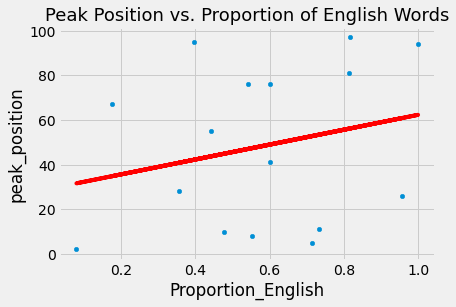

The correlation coefficent for this graph is: 0.241555687033949


In [15]:
word_info_proportion.plot(kind="scatter", x="Proportion_English", y = "peak_position")
plt.title('Peak Position vs. Proportion of English Words', fontsize= 18)
r = np.corrcoef(word_info_proportion['Proportion_English'], word_info_proportion['peak_position'])[0][1]
slope, intercept, r_value, p_value, std_err = linregress(word_info_proportion.get('Proportion_English'), word_info_proportion.get('peak_position'))
plt.plot(word_info_proportion.get('Proportion_English'), intercept + slope*word_info_proportion.get('Proportion_English'), 'r', label='fitted line')
plt.show()
print('The correlation coefficent for this graph is: ' + str(r))

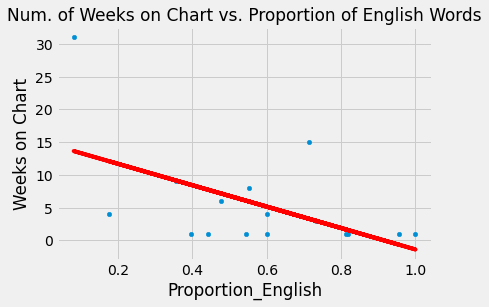

The correlation coefficent for this graph is: -0.5353551677748455


In [16]:
word_info_proportion.plot(kind="scatter", x="Proportion_English", y = "Weeks on Chart")
plt.title('Num. of Weeks on Chart vs. Proportion of English Words', fontsize=17)
r = np.corrcoef(word_info_proportion['Proportion_English'], word_info_proportion['Weeks on Chart'])[0][1]
slope, intercept, r_value, p_value, std_err = linregress(word_info_proportion.get('Proportion_English'), word_info_proportion.get('Weeks on Chart'))
plt.plot(word_info_proportion.get('Proportion_English'), intercept + slope*word_info_proportion.get('Proportion_English'), 'r', label='fitted line')
plt.show()
print('The correlation coefficent for this graph is: ' + str(r))

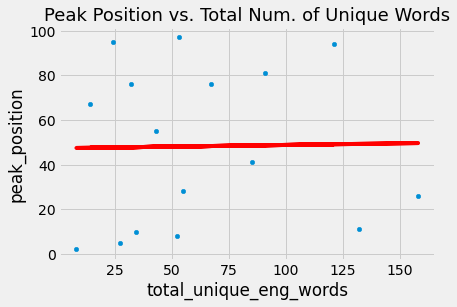

The correlation coefficent for this graph is: 0.018135789163855286


In [17]:
word_info_proportion.plot(kind="scatter", x="total_unique_eng_words", y="peak_position")
plt.title('Peak Position vs. Total Num. of Unique Words', fontsize=18)
r = np.corrcoef(word_info_proportion['total_unique_eng_words'], word_info_proportion['peak_position'])[0][1]
slope, intercept, r_value, p_value, std_err = linregress(word_info_proportion.get('total_unique_eng_words'), word_info_proportion.get('peak_position'))
plt.plot(word_info_proportion.get('total_unique_eng_words'), intercept + slope*word_info_proportion.get('total_unique_eng_words'), 'r', label='fitted line')
plt.show()
print('The correlation coefficent for this graph is: ' + str(r))

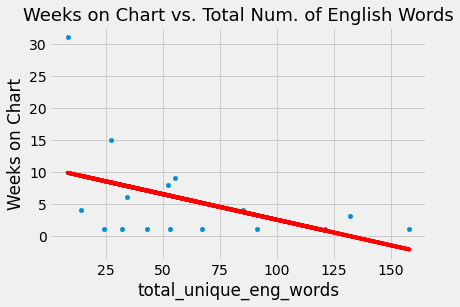

The correlation coefficent for this graph is: -0.4467916102919963


In [18]:
word_info_proportion.plot(kind="scatter", x="total_unique_eng_words", y="Weeks on Chart")
plt.title('Weeks on Chart vs. Total Num. of English Words', fontsize=18)
r = np.corrcoef(word_info_proportion['total_unique_eng_words'], word_info_proportion['Weeks on Chart'])[0][1]
slope, intercept, r_value, p_value, std_err = linregress(word_info_proportion.get('total_unique_eng_words'), word_info_proportion.get('Weeks on Chart'))
plt.plot(word_info_proportion.get('total_unique_eng_words'), intercept + slope*word_info_proportion.get('total_unique_eng_words'), 'r', label='fitted line')
plt.show()
print('The correlation coefficent for this graph is: ' + str(r))

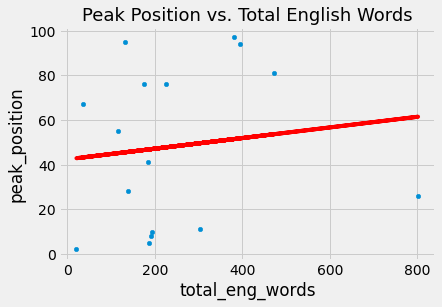

The correlation coefficent for this graph is: 0.12872016676850873


In [19]:
word_info_proportion.plot(kind="scatter", x="total_eng_words", y="peak_position")
plt.title('Peak Position vs. Total English Words', fontsize=18)
r = np.corrcoef(word_info_proportion['total_eng_words'], word_info_proportion['peak_position'])[0][1]
slope, intercept, r_value, p_value, std_err = linregress(word_info_proportion.get('total_eng_words'), word_info_proportion.get('peak_position'))
plt.plot(word_info_proportion.get('total_eng_words'), intercept + slope*word_info_proportion.get('total_eng_words'), 'r', label='fitted line')
plt.show()
print('The correlation coefficent for this graph is: ' + str(r))

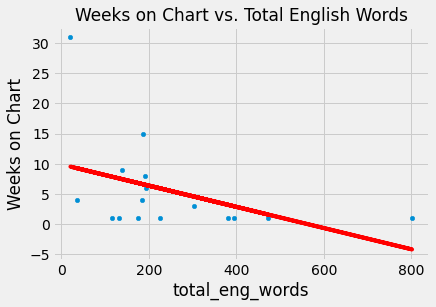

The correlation coefficent for this graph is: -0.4319204745570109


In [20]:
word_info_proportion.plot(kind="scatter", x="total_eng_words", y="Weeks on Chart")
plt.title('Weeks on Chart vs. Total English Words', fontsize=17)
r = np.corrcoef(word_info_proportion['total_eng_words'], word_info_proportion['Weeks on Chart'])[0][1]
slope, intercept, r_value, p_value, std_err = linregress(word_info_proportion.get('total_eng_words'), word_info_proportion.get('Weeks on Chart'))
plt.plot(word_info_proportion.get('total_eng_words'), intercept + slope*word_info_proportion.get('total_eng_words'), 'r', label='fitted line')
plt.show()
print('The correlation coefficent for this graph is: ' + str(r))

## Conclusion:

From the possible correlation coefficents we could calculate, most of the correlation coefficents were very low (below an absolute value of 0.5). Futhermore, the highest correlation coefficent was only -0.535. This leads us to believe that there is not possible correlation between the amount of English lyrics in a K-pop song and its ranking in the Billboard Top 100